In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import numpy as np
import pandas as pd

import os
print(os.listdir("/content/drive/MyDrive/dataset80-20"))
print(os.listdir("/content/drive/MyDrive/dataset80-20/training"))

['testing', 'training']
['normal', 'cnv']


In [30]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import matplotlib.pyplot as plt

In [31]:
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob, os, random

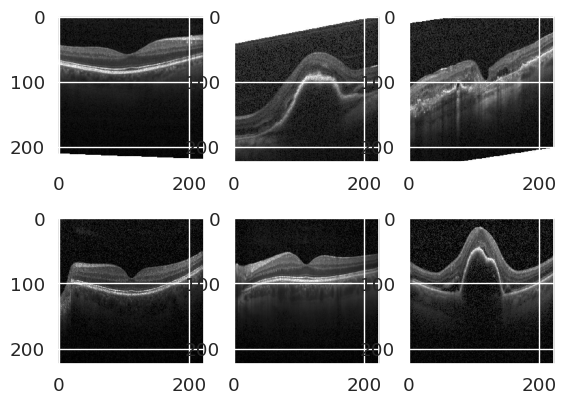

In [32]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
base_path = "/content/drive/MyDrive/dataset80-20/training"
img_list = glob.glob(os.path.join(base_path, '*/*.jpeg'))

for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [33]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/dataset80-20/training",
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    seed=0
)

validation_generator = validation_datagen.flow_from_directory(
    "/content/drive/MyDrive/dataset80-20/testing",
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    seed=0
)

Found 12826 images belonging to 2 classes.
Found 3206 images belonging to 2 classes.


In [34]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((16, 224, 224, 3), (16, 2))

In [35]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'cnv': 0, 'normal': 1}


In [36]:
path = 'labels.txt'
label = np.array(open(path).read().splitlines())

In [37]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [13]:
base_model.trainable = False

In [14]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

In [15]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), #Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
batch_size = 32
epochs = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

<ipython-input-16-2d750b3e08e2>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/200
400/400 [==============================] - 559s 1s/step - loss: 0.3189 - accuracy: 0.9561 - val_loss: 0.0691 - val_accuracy: 0.9775
Epoch 2/200
400/400 [==============================] - 321s 799ms/step - loss: 0.0412 - accuracy: 0.9891 - val_loss: 0.0730 - val_accuracy: 0.9806
Epoch 3/200
400/400 [==============================] - 295s 737ms/step - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.2134 - val_accuracy: 0.9544
Epoch 4/200
400/400 [==============================] - 314s 784ms/step - loss: 0.0275 - accuracy: 0.9911 - val_loss: 0.0984 - val_accuracy: 0.9775
Epoch 5/200
400/400 [==============================] - 327s 817ms/step - loss: 0.0235 - accuracy: 0.9944 - val_loss: 0.0806 - val_accuracy: 0.9819
Epoch 6/200
400/400 [==============================] - 295s 735ms/step - loss: 0.0242 - accuracy: 0.9947 - val_loss: 0.1516 - val_accuracy: 0.9650
Epoch 7/200
400/400 [==============================] - 330s 825ms/step - loss: 0.0217 - accuracy: 0.9953 - val_loss: 0.14

KeyboardInterrupt: ignored

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import PIL.Image as Image
img_path = "/content/drive/MyDrive/normal sample/NORMAL-2132245-2.jpeg"
img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=model.predict(img[np.newaxis, ...])
print(p.shape)
predicted_class = np.argmax(p[0], axis=-1)
print(predicted_class)


fine tuning


In [ ]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [38]:
import keras

file = "/content/drive/MyDrive/models 80-20/mpmv80-20.h5"
keras.models.save_model(model, file)


<ipython-input-38-fe2fe524fc5a>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, file)


In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import keras

# Load the saved model
model_path = "/content/drive/MyDrive/models 80-20/mpmv80-20.h5"
loaded_model = keras.models.load_model(model_path)

# Define the batch size for prediction
batch_size = 16
test_datagen = ImageDataGenerator(
    rescale=1./255
)
# Use the test data generator to get predictions
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/testing',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    seed=0,
    shuffle=False  # Important: Ensure that the data generator doesn't shuffle the data
)

# Predict labels for the test data
predictions = loaded_model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = test_generator.classes

# Compute the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_classes)

# Generate the classification report
class_names = list(test_generator.class_indices.keys())
classification_rep = classification_report(true_labels, predicted_classes, target_names=class_names)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Display the classification report
print("\nClassification Report:")
print(classification_rep)


Found 484 images belonging to 2 classes.
31/31 [==============================] - 17s 530ms/step
Confusion Matrix:
[[242   0]
 [  0 242]]

Classification Report:
              precision    recall  f1-score   support

    cnv test       1.00      1.00      1.00       242
 normal test       1.00      1.00      1.00       242

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import keras

# Load the saved model
model_path = "/content/drive/MyDrive/models 60-40/mpmv60-40.h5"
loaded_model = keras.models.load_model(model_path)

# Define the batch size for prediction
batch_size = 16
test_datagen = ImageDataGenerator(
    rescale=1./255
)
# Use the test data generator to get predictions
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/testing',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    seed=0,
    shuffle=False  # Important: Ensure that the data generator doesn't shuffle the data
)

# Predict labels for the test data
predictions = loaded_model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = test_generator.classes

# Compute the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_classes)

# Generate the classification report
class_names = list(test_generator.class_indices.keys())
classification_rep = classification_report(true_labels, predicted_classes, target_names=class_names)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Display the classification report
print("\nClassification Report:")
print(classification_rep)

Found 484 images belonging to 2 classes.
31/31 [==============================] - 19s 593ms/step
Confusion Matrix:
[[242   0]
 [  0 242]]

Classification Report:
              precision    recall  f1-score   support

    cnv test       1.00      1.00      1.00       242
 normal test       1.00      1.00      1.00       242

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



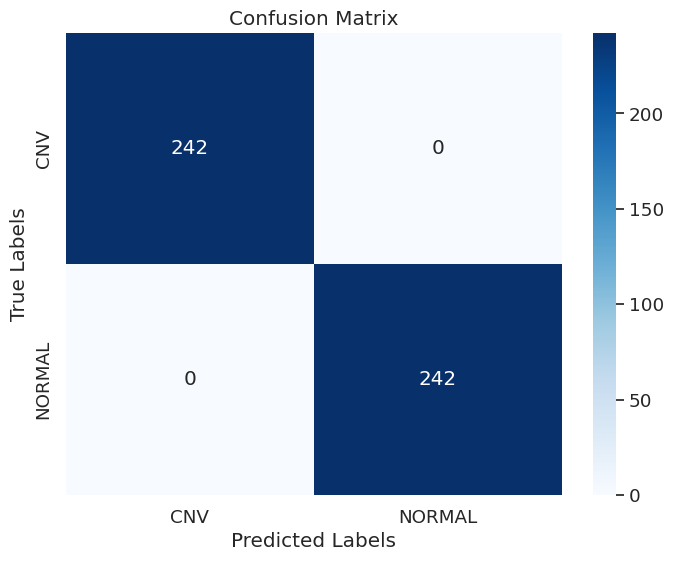

In [20]:
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
#model_path = r'C:\Users\shilp\Downloads\major project\models\model-vggnet19-80-20.h5'
#model = load_model(model_path)

# Calculate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["CNV", "NORMAL"], yticklabels=["CNV", "NORMAL"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Found 484 images belonging to 2 classes.
31/31 [==============================] - 19s 541ms/step


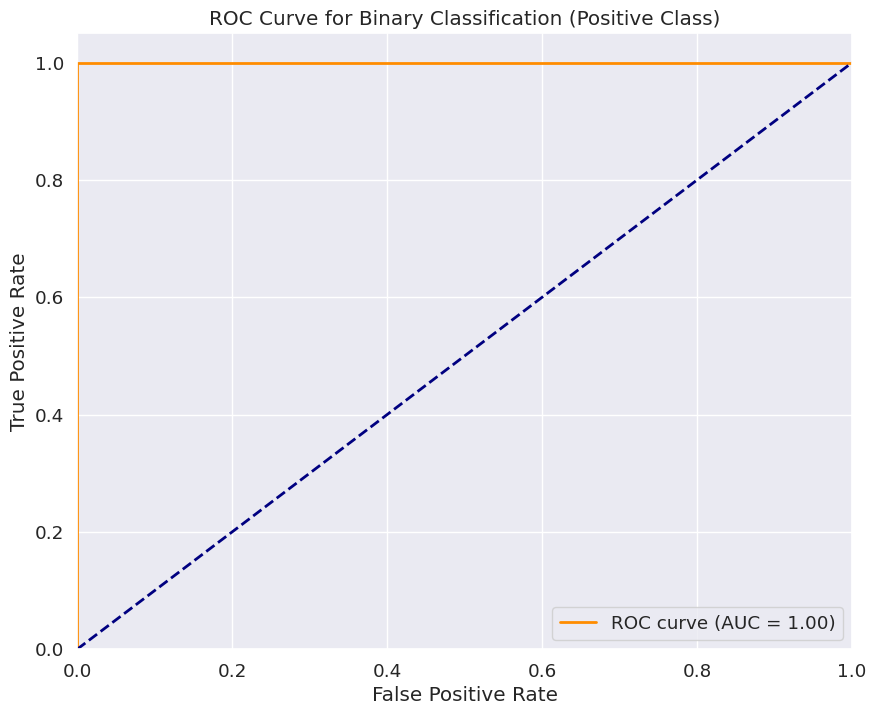

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the trained MobileNetV2 model
model_path = "/content/drive/MyDrive/models 80-20/mpmv80-20.h5"
model = load_model(model_path)

# Data Generator for your test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/testing",
    target_size=(224, 224),
    batch_size=16,  # Adjust batch size as needed
    class_mode='categorical',  # Assuming categorical classification
    shuffle=False  # Important: Ensure that the data generator doesn't shuffle the data
)

# Predict probabilities for the test dataset
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Assuming you have multiple classes, you can choose one class as the positive class.
# For binary classification, select the class corresponding to "affected" or "positive" class.
# In this example, let's assume the positive class is index 1.
positive_class_index = 0

# Extract the true labels for the positive class
true_labels = (test_generator.classes == positive_class_index).astype(int)

# Calculate the ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(true_labels, predictions[:, positive_class_index])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification (Positive Class)')
plt.legend(loc="lower right")
plt.show()
